In [5]:
from src.raw_datset import raw_dataset, StatisticsFile
import os
from src.plots import plot_categorical_column, plot_stacked_errors_with_percent_legend, plot_stacked_errors_with_percent_legend_by_annotator_id

directory = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025_Annotations/2025-09-09"
local_files = raw_dataset(directory)
local_files.reset_errors()

# Error Characterizer
Enter the number corresponding to the type of error

0. No Error
1. Uncentered Box
2. Severely Uncentered Box
3. Missed Target
4. Blank Box
5. Silt Transpose Error
6. Occlusion [Edge or star]
7. Other
8. Unknown
9. Long Satellite Streak

155it [09:11, 13.60s/it]

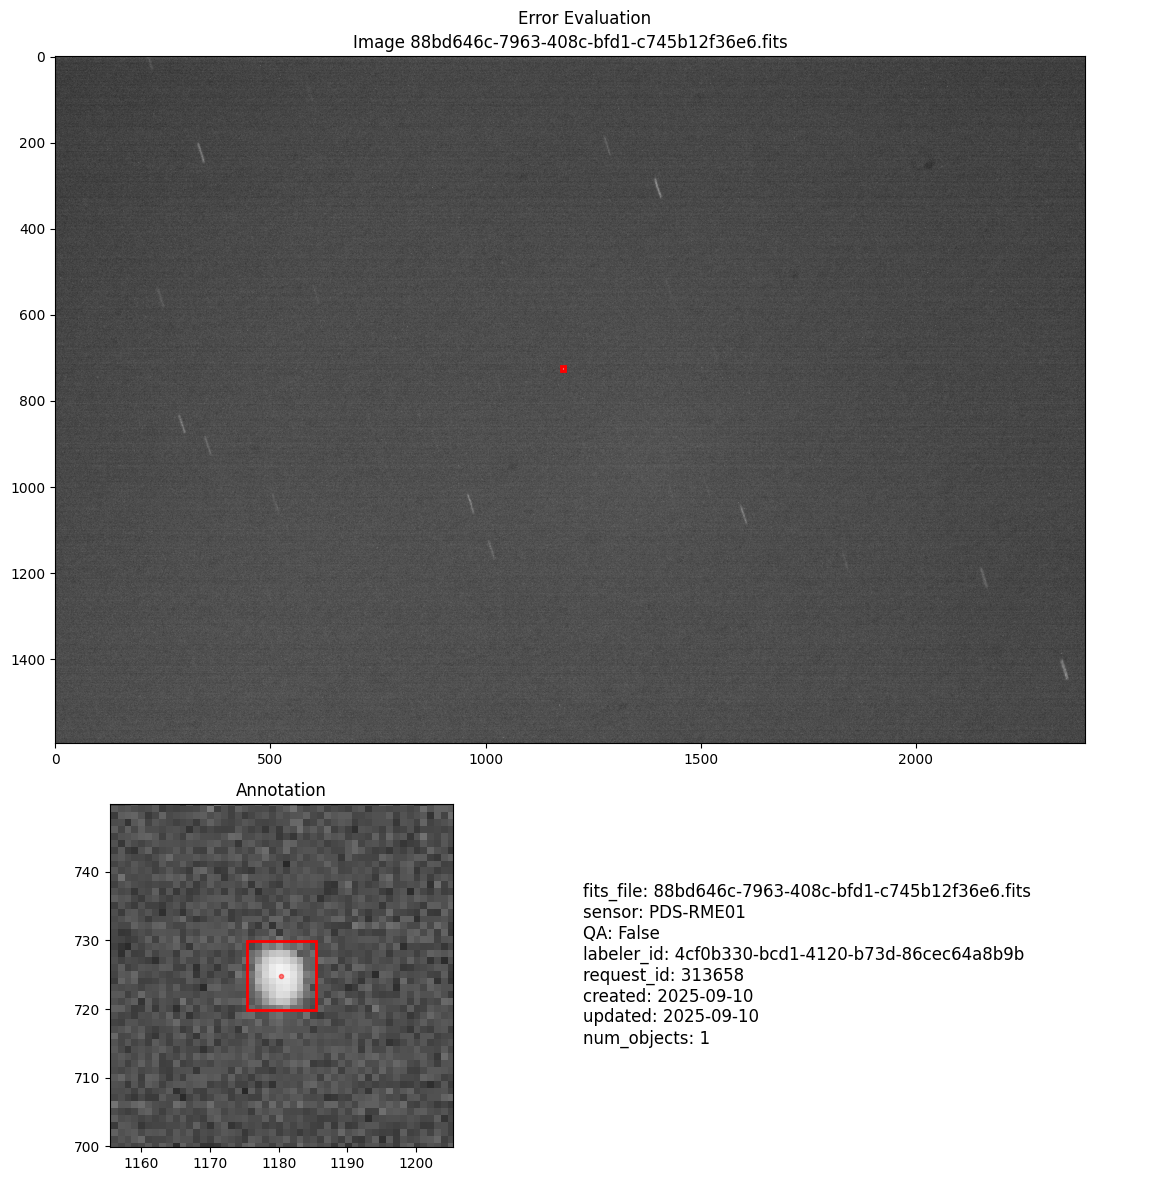

155it [09:14,  3.58s/it]


KeyboardInterrupt: Interrupted by user

In [6]:
local_files = raw_dataset(directory)
local_files.characterize_errors()

# Generate Error Report

Index(['fits_file', 'sensor', 'QA', 'labeler_id', 'request_id', 'created',
       'updated', 'num_objects', 'error_type', 'error_type_str'],
      dtype='object')

Column: QA
-----------
Value  Count Percentage
False    158    100.00%

Column: error_type_str
-----------------------
                Value  Count Percentage
             No Error    147     93.04%
            Blank Box      5      3.16%
Long Satellite Streak      3      1.90%
              Unknown      2      1.27%
        Missed Target      1      0.63%

Column: created
----------------
     Value  Count Percentage
2025-09-10    153     96.84%
2025-09-11      5      3.16%


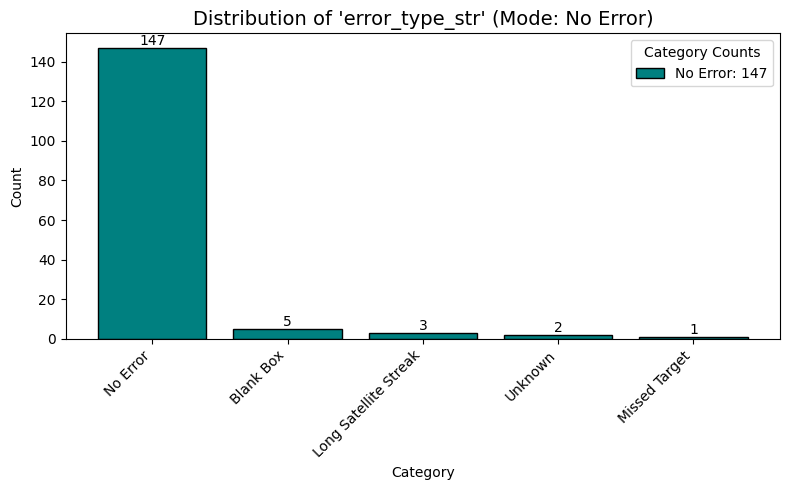

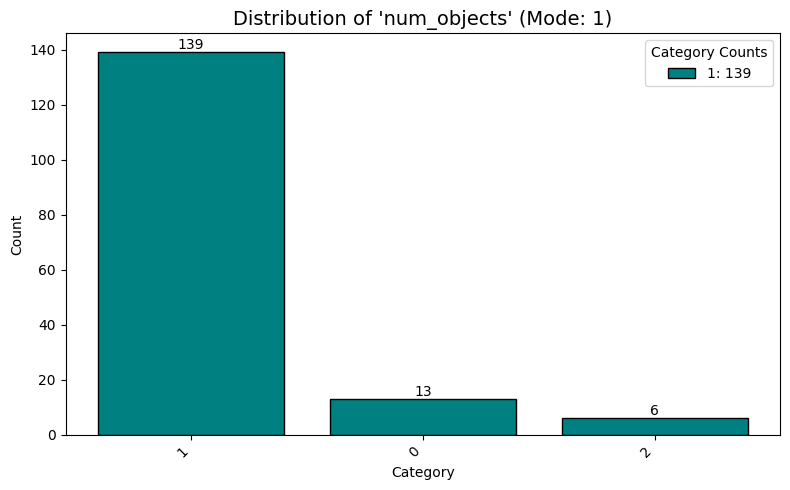

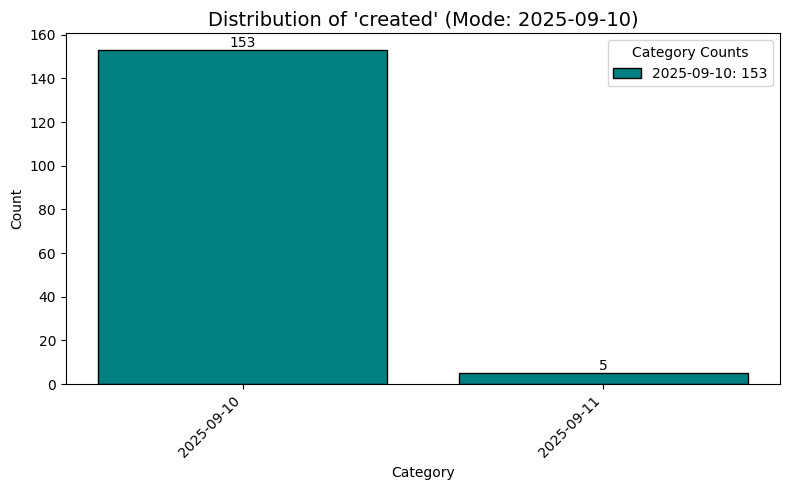

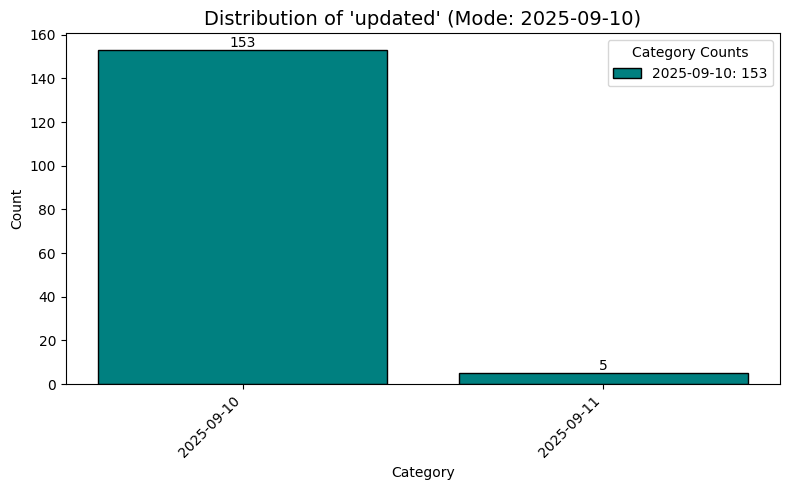

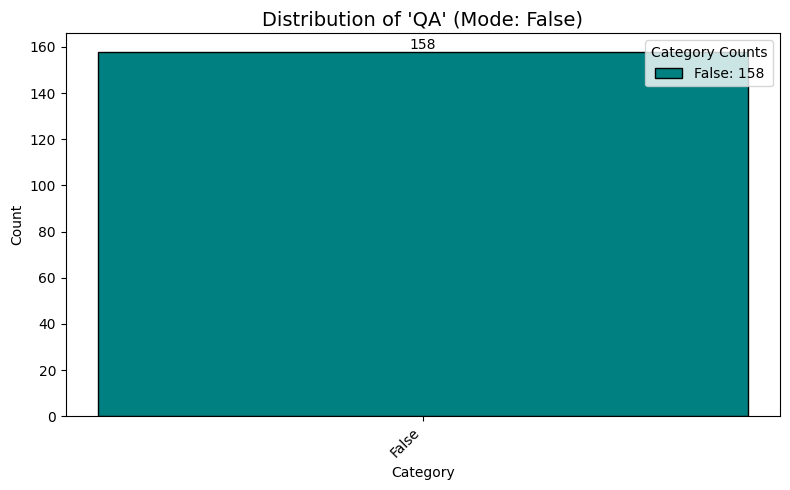

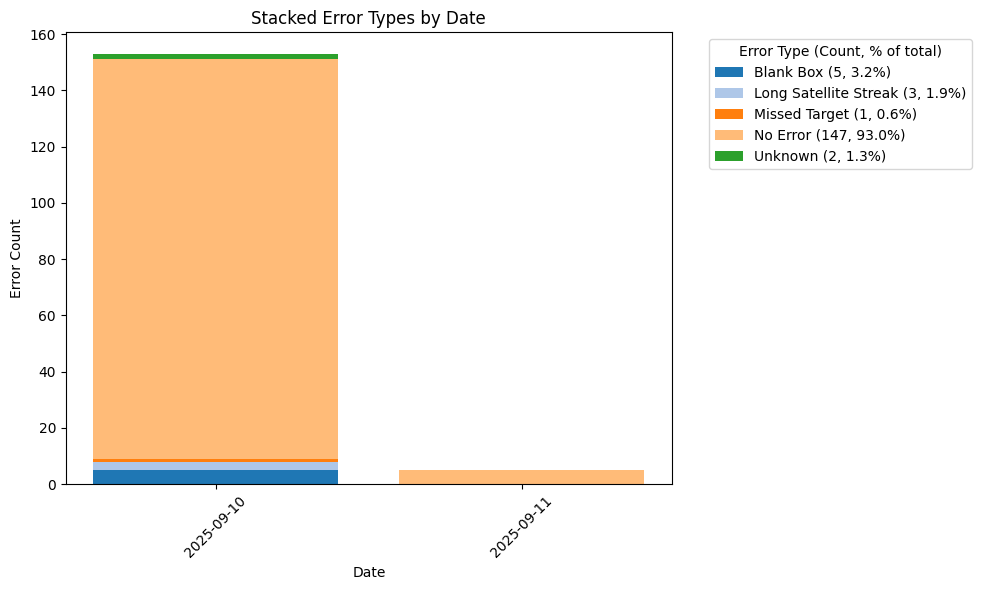

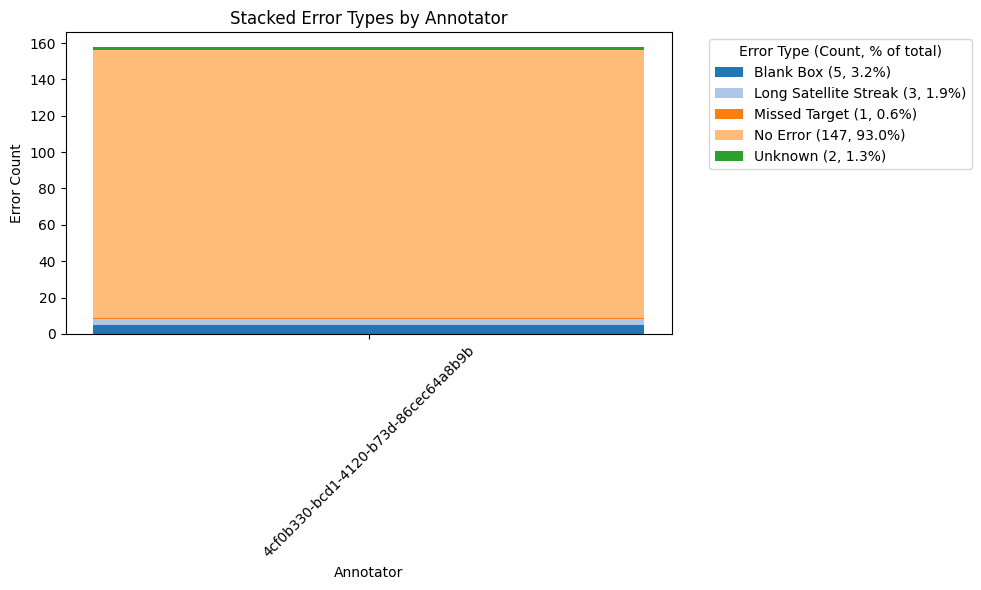

In [7]:
error_file = StatisticsFile().load(os.path.join(directory, "errors.pkl"))
errors_dataset = error_file.sample_attributes

print(errors_dataset.columns)

error_file.summarize_sample_attribute_columns("sample_attributes", ["QA", "error_type_str", "created"])
plot_categorical_column(errors_dataset["error_type_str"])
plot_categorical_column(errors_dataset["num_objects"])
plot_categorical_column(errors_dataset["created"])
plot_categorical_column(errors_dataset["updated"])
plot_categorical_column(errors_dataset["QA"])

# Plot
plot_stacked_errors_with_percent_legend(errors_dataset)
plot_stacked_errors_with_percent_legend_by_annotator_id(errors_dataset)